<a href="https://colab.research.google.com/github/tylerchi1000/Web-Scraper-Sentiment-Analysis/blob/WIP-Indeed-Scraper/Scraper_Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Review Scraper


In [ ]:
#Scrapes Reviews From Amazon Review Pages (USA)
#Utilizes the Scraper API in order to bypass wait restrictions and avoid blockage.
#Additional Documentation for Scraper API available at https://www.scraperapi.com/documentation/


import requests
import csv
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [ ]:
#Thanks to John Watson Rooney for his excellent video on using Beatiful Soup https://www.youtube.com/watch?v=DIT8rwyPEns&t=380s 

# SAMPLE API CODE curl "http://api.scraperapi.com?api_key=1081312d4de6bfa2d256048cd767a530&url=http://httpbin.org/ip"

In [ ]:
url = 'https://www.amazon.com/Streaming-Microphone-Widescreen-Conferencing-Recording/product-reviews/B082X91MPP/ref=cm_cr_arp_d_viewopt_rvwer?ie=UTF8&reviewerType=all_reviews&pageNumber=1'
APIKEY = ''

In [ ]:
#reviews = soup.find_all('div', {'data-hook': 'review'})

In [ ]:
#For Experimenting 

'''
for item in reviews:
  review = {
    'product' : soup.title.text.replace('Amazon.com: Customer reviews:', '').strip(),
    'title' : item.find('a', {'data-hook': 'review-title'}).text.strip(),
    'date' : item.find('span', {'data-hook' : 'review-date'}).text.strip(),
    #Retreive Rating from i data hook: remove additional text and convert to float
    'rating' : float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
    'body' : item.find('span', {'data-hook': 'review-body'}).text.strip()
  }
  '''

In [ ]:
#Sends Request to URL Using Scraper API, and returns html parsed soup
def get_soup(url):
  payload = {'api_key': APIKEY, 'url': url}
  r = requests.get('http://api.scraperapi.com', params=payload)
  soup = BeautifulSoup(r.text, 'html.parser')
  return soup

In [ ]:
def get_reviews(soup):
  reviews = soup.find_all('div', {'data-hook': 'review'})
  
  #Better way to handle errors???
  try:
    for item in reviews:
      review = {
        'product' : soup.title.text.replace('Amazon.com: Customer reviews:', '').strip(),
        'title' : item.find('a', {'data-hook': 'review-title'}).text.strip(),
        #Retreive Rating from i data hook: remove additional text and convert to float
        'rating' : float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
        'body' : item.find('span', {'data-hook': 'review-body'}).text.strip()
      }
      #Remember to create list called reviewlist, or add function to create list
      reviewlist.append(review)
  except:
      pass
  

In [ ]:
#Example, Pull pages 1-5 from amazon url
reviewlist = []
for x in range(1,5):
  soup = get_soup(f'https://www.amazon.com/Stardrops-Ultimate-Cleaning-Multi-Purpose-Bathroom/product-reviews/B08V7G5GYH/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
  print(f'Getting page: {x}')
  get_reviews(soup)
  #print(len(reviewlist))
  if not soup.find('li', {'class': 'a-disabled a-last'}):
    pass
  else:
    break

Getting page: 1
Getting page: 2
Getting page: 3
Getting page: 4


In [ ]:
df = pd.DataFrame(reviewlist)

In [ ]:
df

,product,title,rating,body
0,Stardrops - The Pink Stuff - Ultimate Bundle -...,Highly recommend this powerhouse cleaner. Plea...,5.0,Received the tub of paste damaged. I emailed t...
1,Stardrops - The Pink Stuff - Ultimate Bundle -...,"Amazing, cuts cleaning time in half!",5.0,I'm quite impressed with this stuff. I clean h...
2,Stardrops - The Pink Stuff - Ultimate Bundle -...,Miracle Cleaner,5.0,This stuff is a miracle cleaner. Seriously. I ...
3,Stardrops - The Pink Stuff - Ultimate Bundle -...,I love these but…,3.0,I love these cleaning products. They are expen...
4,Stardrops - The Pink Stuff - Ultimate Bundle -...,So Far So Good!,5.0,I have ceramic tile in my shower from the 1960...
5,Stardrops - The Pink Stuff - Ultimate Bundle -...,Good Stuff!,4.0,Arrived in great condition individually plasti...
6,Stardrops - The Pink Stuff - Ultimate Bundle -...,It isn't all that the hype makes you think it is.,1.0,Honest review here. Tried one of the products ...
7,Stardrops - The Pink Stuff - Ultimate Bundle -...,"Fantastic products, don't pass them by!",5.0,I had already used the paste in the jar and wa...
8,Stardrops - The Pink Stuff - Ultimate Bundle -...,I can't believe it,5.0,I bought this because it was recommended for t...
9,Stardrops - The Pink Stuff - Ultimate Bundle -...,Not worth the hype at all.,3.0,I don’t know who is lying in these reviews or ...


# Sentiment Analysis


In [ ]:
!pip install -q transformers
!pip install tensorflow_hub
!pip install tensorflow_text


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
train = df.copy()

In [ ]:
conditions = [
    (df['rating'] >= 4),
     (df['rating'] < 4)
]
values = ['positive','negative']
train['Sentiment'] = np.select(conditions, values)

In [ ]:
train['rating'].value_counts()

1.0    13
5.0     9
2.0     8
3.0     6
4.0     4
Name: rating, dtype: int64

Example of Sentiment Analysis Using BERT. BERT is a powerful NLP model developed by Google. A review of 4 and above is generally considered positive, while anything less than that is negative. While some reviewers that give 3-4 stars may be neutral at the end of the day the review will hurt the prodcut. 

In [ ]:
#Rhttps://www.kaggle.com/datasets/bittlingmayer/amazonreviews?datasetId=1305&sortBy=voteCount
#Kaggle Dataset of Amazon Reviews

import bz2
data = bz2.BZ2File('/content/drive/MyDrive/Data Analytics Projects/Data/Amazon Review Kaggle/test.ft.txt.bz2')

test_df = bz2.BZ2File('/content/drive/MyDrive/Data Analytics Projects/Data/Amazon Review Kaggle/train.ft.txt.bz2')


data = data.readlines()
data = [x.decode('utf-8') for x in data]
data = pd.DataFrame(data)

In [ ]:
len(data)

400000

In [ ]:
test = data[0:10]
test

,0
0,__label__2 Great CD: My lovely Pat has one of ...
1,__label__2 One of the best game music soundtra...
2,__label__1 Batteries died within a year ...: I...
3,"__label__2 works fine, but Maha Energy is bett..."
4,__label__2 Great for the non-audiophile: Revie...
5,__label__1 DVD Player crapped out after one ye...
6,__label__1 Incorrect Disc: I love the style of...
7,__label__1 DVD menu select problems: I cannot ...
8,__label__2 Unique Weird Orientalia from the 19...
9,"__label__1 Not an ""ultimate guide"": Firstly,I ..."


In [ ]:
data.columns = ['Text']
data['Label'] = data['Text'].str.slice(9,10).astype(int) - 1
data['Text'] = data['Text'].str[10:]
data['Text'] = data['Text'].str.strip()

In [ ]:
data

,Text,Label
0,Great CD: My lovely Pat has one of the GREAT v...,1
1,One of the best game music soundtracks - for a...,1
2,Batteries died within a year ...: I bought thi...,0
3,"works fine, but Maha Energy is better: Check o...",1
4,Great for the non-audiophile: Reviewed quite a...,1
...,...,...
399995,Unbelievable- In a Bad Way: We bought this Tho...,0
399996,"Almost Great, Until it Broke...: My son reciev...",0
399997,Disappointed !!!: I bought this toy for my son...,0
399998,Classic Jessica Mitford: This is a compilation...,1


In [ ]:
data = data[0:50000]

In [ ]:
X = data['Text']
y = data['Label']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

242245    Very Mediocre: The fake velvet touch only enha...
288918    Downton Abbey: I love it love it love it. I wo...
105103    Roses Are Red: Disappointed in this one. They ...
63504     Awful Experience: This Microsoft mouse stopped...
239180    I must have seen a different movie: I have one...
                                ...                        
259178    You can fool all the people some of the time b...
365838    It was good but not good: It was an 'okay' boo...
131932    Unwatchable: The product arrived promptly and ...
146867    Not worth the money or the time to read.: The ...
121958    A nice shift into a gifted mind with multiple ...
Name: Text, Length: 320000, dtype: object

In [ ]:
max_features = 10000
sequence_length = 250

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(max_features = max_features)
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [ ]:
X_train

<8000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 420422 stored elements in Compressed Sparse Row format>

In [ ]:
X_train = X_train.toarray()

In [ ]:
X_test = X_test.toarray()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(layers.Dense(16, input_dim=max_features, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                160016    
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                160016    
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,033
Trai

In [ ]:
X_test.shape

(2000, 5000)

In [ ]:
epochs = 10
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = epochs)


Epoch 1/10
1250/1250 [==============================] - 15s 11ms/step - loss: 0.3402 - accuracy: 0.8619 - val_loss: 0.2950 - val_accuracy: 0.8820
Epoch 2/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.2323 - accuracy: 0.9111 - val_loss: 0.3077 - val_accuracy: 0.8767
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1972 - accuracy: 0.9247 - val_loss: 0.3333 - val_accuracy: 0.8742
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1700 - accuracy: 0.9349 - val_loss: 0.3528 - val_accuracy: 0.8713
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1420 - accuracy: 0.9456 - val_loss: 0.3868 - val_accuracy: 0.8661
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1152 - accuracy: 0.9571 - val_loss: 0.4242 - val_accuracy: 0.8652
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0920 - accuracy: 0.9677 - val_loss: 0.4726 - val_accura

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']


In [ ]:
epochs

10

(0.0, 0.6750402873381972)

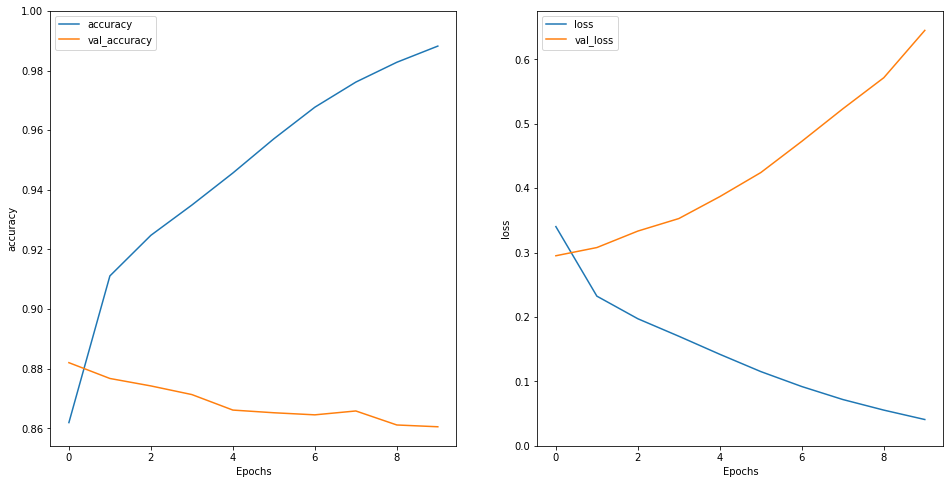

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)


In [ ]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
  import time
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port = 6006

In [ ]:
'''
import tensorflow_datasets as tfds
datasets, info = tfds.load('imdb_reviews', as_supervised=True, with_info=True)
train_size = info.splits['train'].num_examples

BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

vocab = np.array(encoder.get_vocabulary())
vocab[:20]

encoded_example = encoder(example)[:3].numpy()
encoded_example

for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)
'''

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteP6S12T/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteP6S12T/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteP6S12T/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
def text_preprocess(X_batch):
  X_batch = tf.strings.substr(X_batch, 0, 300) #Uses only the first 300 characters of a reivew
  #X_batch = tf.strings.regex_replace(X_batch, b"<br\\s*/?>", b" ")
  X_batch = tf.strings.regex_replace(X_batch, b"[^a-zA-Z']", b" ") #Removes non space punctuation
  X_btach = tf.strings.split(X_batch)                        #Splits to ragged Tensor (to be padded)
  return X_batch.to_tensor(default_value=b"<pads>") #Pads Tensors so they have the same length

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [ ]:
#Generate Accuracy and Loss graphcs
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)


In [ ]:
#Quick BERT model. Should add word padding and clean the text.

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [ ]:
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

In [ ]:
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [ ]:
import keras
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
#from keras import backend as K
#K.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3711705226862566217
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11320098816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14909314759690345526
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]


In [ ]:
miniX = X_train[0:2000]
miniy = y_train[0:2000]

In [ ]:
model.fit(miniX, miniy, epochs=10)

Epoch 1/10
 3/63 [>.............................] - ETA: 13:57 - loss: 0.6822 - accuracy: 0.5208 - precision: 0.5119 - recall: 0.8958

In [ ]:
testmini = X_test[0:2000]
testminiy = y_test[0:2000]

In [ ]:
y_predicted = model.predict(testmini)
y_predicted = y_predicted.flatten()

In [ ]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testminiy, y_predicted)

array([[796, 180],
       [261, 763]])

# Indeed Job **Scraper**
WIP

In my current job search I found it inefficient to manually sort through entry level positions due to greatly varying requirements. While an applicant does not need to have skills to the letter of the requirements, it would help to be able to filter by actual description rather than by entry/intermediate etc. 

In [1]:
import requests
import csv
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame(columns=['Title', 'Description', 'Link'])

In [3]:
APIKEY = '1081312d4de6bfa2d256048cd767a530'

HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/90.0.4430.212 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

In [4]:
url = 'https://www.indeed.com/jobs?q=Remote+Data+Analyst&start=10'
payload = {'api_key': APIKEY, 'url': url}
r = requests.get('http://api.scraperapi.com', params=payload, headers = HEADERS)
soup = BeautifulSoup(r.text, 'html.parser')

In [5]:
r = requests.get('https://www.indeed.com/jobs?q=Remote+Data+Analyst&start=10', headers = HEADERS)
soup = BeautifulSoup(r.text, 'html.parser')

In [6]:
entry = soup.find_all('td', class_='resultContent')
entry

[<td class="resultContent"><div class="heading4 color-text-primary singleLineTitle tapItem-gutter"><h2 class="jobTitle jobTitle-newJob"><div class="new topLeft holisticNewBlue desktop"><span class="label">new</span></div><a aria-label="full details of Data Analyst" class="jcs-JobTitle" data-hide-spinner="true" data-hiring-event="false" data-jk="a5da143406f5db0e" data-mobtk="1g2vm2jg22eon000" href="/rc/clk?jk=a5da143406f5db0e&amp;fccid=5f7c8e9b696f11aa&amp;vjs=3" id="job_a5da143406f5db0e" role="button" target="_blank"><span title="Data Analyst">Data Analyst</span></a></h2></div><div class="heading6 company_location tapItem-gutter companyInfo"><span class="companyName">BlocPower</span><div class="companyLocation"><span>Remote</span></div></div><div class="heading6 tapItem-gutter metadataContainer noJEMChips salaryOnly"><div class="metadata salary-snippet-container"><div class="attribute_snippet"><svg aria-hidden="true" aria-label="Salary" fill="none" role="presentation" viewbox="0 0 16 1

In [8]:
#Get Job Title
for item in entry:
  item1 = item.a.span['title']
  #title = item.div.h2.a['title']
  print(item1)

    

Data Analyst
Immunization Data & Equity Analyst (REMOTE WORK OPTION IN-STATE)
Data Access Request Analyst
Data and Reporting Analyst (Remote)
WFM Real-Time Analyst, Ring Workforce Management
Data Analyst
Data Analyst: Technical Business Intelligence
Health Data Analyst I
Business Analyst
Data Analyst I
Data Analyst
Senior Data Analyst - Remote
Provisioning Assistant/ Business Analyst
Junior Data Analyst
Remote Data Analyst


In [ ]:
#Get Job Posted Date
postinginfo = soup.find_all

''

In [9]:
def get_soup(url):
  payload = {'api_key': APIKEY, 'url': url}
  r = requests.get('http://api.scraperapi.com', params=payload)
  soup = BeautifulSoup(r.text, 'html.parser')
  return soup

In [10]:
#Test on Individual Job Page
posting = get_soup('https://www.indeed.com/viewjob?jk=2b788a513ef84078&tk=1g2vlultgmsap800&from=serp&vjs=3')

In [11]:
posting_info = posting.find(class_='jobsearch-HiringInsights-entry--text').get_text()

In [12]:
posting_info

'Posted 3 days ago'

In [13]:
'''base_link = 'https://www.indeed.com'


for number in range(0, 20, 10):
  
  soup = get_soup(('https://www.indeed.com/jobs?q=Remote+Data+Analyst&start={}').format(number))
'''

base_link = 'https://www.indeed.com'
df = pd.DataFrame(columns=['Title', 'Description', 'Link', 'Date_Posted'])

for number in range(0,20,10):
  soup = get_soup(f'https://www.indeed.com/jobs?q=Remote+Data+Analyst&start={number}')
  entry = soup.find_all('td', class_='resultContent')
  print(number)
  for item in entry:
      #Job Title
      title = item.find(class_='jobTitle').text
      #company = item.find('span', class_='companyName').text.strip()
      
      #testing
      #try:
      #  rating = item.find('span', class_='ratingsDisplay withRatingLink').text.strip()
      #except:
      #  review = ''

      
      #Get specific posting link
      link = item.a['href']
      new_link = base_link + link
      print(new_link)
      #Request Page
      #payload = {'api_key': APIKEY, 'url': new_link}
      #r = requests.get('http://api.scraperapi.com', params=payload, headers = HEADERS)
      #soup = BeautifulSoup(r.text, 'html.parser')
      soup = get_soup(new_link)
      #Retrieve Description
      description = soup.find(class_='jobsearch-jobDescriptionText').get_text()
      posting_date = soup.find(class_='jobsearch-HiringInsights-entry--text').get_text()
      df.loc[len(df.index)] = [title, description, new_link, posting_date]
      #df.loc[len(df.index)] = [title, company, rating, description, new_link]


0
https://www.indeed.com/rc/clk?jk=22e5be352a41f80e&fccid=11caadcdc98800d4&vjs=3
https://www.indeed.com/rc/clk?jk=42cee3a457fb8e38&fccid=45291f8ebb1ddbd7&vjs=3
https://www.indeed.com/rc/clk?jk=7cec74998b596659&fccid=c5ea80037eec1b5c&vjs=3
https://www.indeed.com/rc/clk?jk=c12649fac676ff75&fccid=fc68da685e8aa986&vjs=3
https://www.indeed.com/rc/clk?jk=a5da143406f5db0e&fccid=5f7c8e9b696f11aa&vjs=3
https://www.indeed.com/rc/clk?jk=79ecda9cb9e9803f&fccid=c031cad2ec931317&vjs=3
https://www.indeed.com/rc/clk?jk=ca5478b5673322ac&fccid=64e4cdd7435d8c42&vjs=3
https://www.indeed.com/rc/clk?jk=1b69b56cac09ab1d&fccid=fd328fb1f491e9c4&vjs=3
https://www.indeed.com/rc/clk?jk=6cf6398410153a0c&fccid=82e58e9861d48566&vjs=3
https://www.indeed.com/rc/clk?jk=ce928e7e957ceddf&fccid=c10d511b96782b65&vjs=3
https://www.indeed.com/rc/clk?jk=f3a32dc801075a26&fccid=64e4cdd7435d8c42&vjs=3
https://www.indeed.com/rc/clk?jk=f16fee4d087b8c95&fccid=2c23f29fcd5c78da&vjs=3
https://www.indeed.com/company/Korn-Ferry-for-Relx

In [29]:
df.head()

,Title,Description,Link,Date_Posted
0,newData Analyst (100% Remote),\n\nTravel Required: None \nPublic Trust: Othe...,https://www.indeed.com/rc/clk?jk=22e5be352a41f...,Posted today
1,Data Analyst - 2022 Cycle,\n\nThe Democratic Data Exchange (DDx) is look...,https://www.indeed.com/rc/clk?jk=42cee3a457fb8...,Posted 14 days ago
2,"newData Analyst, REMOTE!","\n\n Data Analyst, REMOTE!\n Dare to design...",https://www.indeed.com/rc/clk?jk=7cec74998b596...,Posted Today
3,newRemote Banking Data Analyst,\n\nPiper Companies is seeking a Remote Bankin...,https://www.indeed.com/rc/clk?jk=c12649fac676f...,Posted today
4,newData Analyst,\n\n\n\n BlocPower is a clean energy leader...,https://www.indeed.com/rc/clk?jk=a5da143406f5d...,Posted 1 day ago


In [80]:
def date_fixes(dfcopy):
  dfcopy['Date_Posted'] = dfcopy['Date_Posted'].replace({'Posted today': 1})
  dfcopy['Date_Posted'] = dfcopy['Date_Posted'].replace({'Posted Today': 1})
  #Urgently Hiring = 0 Days
  dfcopy['Date_Posted'] = dfcopy['Date_Posted'].str.replace(r'[^0-9]+', '')
  dfcopy['Date_Posted'] = dfcopy['Date_Posted'].fillna(0)
  return dfcopy

In [16]:
#Export to Excel Sheet
df.to_excel('JobPostings.xlsx', 'df1')

In [26]:
#Remove number from start Url
def get_postings(start_url, pages):
  base_link = 'https://www.indeed.com'
  df = pd.DataFrame(columns=['Title', 'Description', 'Link', 'Date_Posted'])

  #Set page range- Could use better system for dynamic page, but link system
  #for indeed is simple
  for number in range(10,pages*10,10):
    soup = get_soup(start_url + f'{number}')
    entry = soup.find_all('td', class_='resultContent')
    print(number)
    for item in entry:
        #Job Title
        title = item.find(class_='jobTitle').text
        #Get specific posting link
        link = item.a['href']
        new_link = base_link + link
        print(new_link)
        #Retrieve Job Page (single) from Link
        soup = get_soup(new_link)
        #Retrieve Description
        description = soup.find(class_='jobsearch-jobDescriptionText').get_text()
        posting_date = soup.find(class_='jobsearch-HiringInsights-entry--text').get_text()
        df.loc[len(df.index)] = [title, description, new_link, posting_date]
  return df

In [18]:
remoteAnalystInternUrl = 'https://www.indeed.com/jobs?q=data+analyst+intern+remote&start='
Intern_Df = get_postings(remoteAnalystInternUrl)

0
https://www.indeed.com/rc/clk?jk=b7662aebc950393e&fccid=cf2a618027c975ad&vjs=3
https://www.indeed.com/rc/clk?jk=5daed0d0b6e9c9b4&fccid=9a386f5dac9ffc6c&vjs=3
https://www.indeed.com/rc/clk?jk=d6869cb4ffb7a01c&fccid=12c109dc261fc3cb&vjs=3
https://www.indeed.com/rc/clk?jk=2f650a69abb39fa6&fccid=2525cc4a9a704809&vjs=3
https://www.indeed.com/rc/clk?jk=63552c90d862a839&fccid=bc5afa013c617a43&vjs=3
https://www.indeed.com/rc/clk?jk=80d849dd0faf1a83&fccid=0d526257d976e5ac&vjs=3
https://www.indeed.com/rc/clk?jk=d96407d833c32bd7&fccid=4600afcfb0f58ad6&vjs=3
https://www.indeed.com/rc/clk?jk=867a36cdb1d39bdc&fccid=ec06270e79e18b30&vjs=3
https://www.indeed.com/rc/clk?jk=36b4e6cd84ba3cfd&fccid=0d26bf2273c73e76&vjs=3
https://www.indeed.com/company/Xilis,-Inc./jobs/Data-Analyst-Intern-69e797aa5d5607c7?fccid=0043ae875cc9c558&vjs=3
https://www.indeed.com/rc/clk?jk=3a4177c915c86ca7&fccid=65ae769cb89830ec&vjs=3
https://www.indeed.com/rc/clk?jk=c77ac5d6fda2bfdc&fccid=ed62b3b73096b79f&vjs=3
https://www.ind

In [22]:
Intern_Df2 = get_postings(remoteAnalystInternUrl, 8)

20
https://www.indeed.com/rc/clk?jk=81fc5350b52ec631&fccid=437fb825bf2dab94&vjs=3
https://www.indeed.com/rc/clk?jk=e28a9937f93f7d74&fccid=d46b413c42e26024&vjs=3
https://www.indeed.com/rc/clk?jk=e578845ca96b97f7&fccid=0a1f074e402103eb&vjs=3
https://www.indeed.com/rc/clk?jk=f805f8b0b406a5c7&fccid=8b11bd0c33da064e&vjs=3
https://www.indeed.com/rc/clk?jk=f7d786b4e303e420&fccid=d7d403f3184c0ee9&vjs=3
https://www.indeed.com/rc/clk?jk=cb39fe7c6c49bbe7&fccid=d5998a961671e818&vjs=3
https://www.indeed.com/rc/clk?jk=5e75741f05287169&fccid=cc007169ef81dc6a&vjs=3
https://www.indeed.com/rc/clk?jk=7e8449ea0c9b427a&fccid=62574ebc55ba181d&vjs=3
https://www.indeed.com/rc/clk?jk=087efd9e72f76f94&fccid=bcabf9e77904fbd5&vjs=3
https://www.indeed.com/rc/clk?jk=e261067fc4409030&fccid=209a3e1cb8a469f5&vjs=3
https://www.indeed.com/rc/clk?jk=6bcbe479316ace55&fccid=e13f6dd1777d5161&vjs=3
https://www.indeed.com/company/HCSS/jobs/Product-Analyst-Intern-d20179daaf1cc9e8?fccid=59594c2798abdbf8&vjs=3
https://www.indeed

In [19]:
Intern_Df.head()

,Title,Description,Link,Date_Posted
0,newData Analyst Intern,\n\n Overview: \n \n ~This is a remote oppor...,https://www.indeed.com/rc/clk?jk=b7662aebc9503...,Posted Today
1,Product Operations Analyst Intern - Summer 202...,\n\n\n\n Are you looking to be in a workpla...,https://www.indeed.com/rc/clk?jk=5daed0d0b6e9c...,Posted 21 days ago
2,Data Engineering Intern,"\n\n\n At Tinder, we are passionate about bu...",https://www.indeed.com/rc/clk?jk=d6869cb4ffb7a...,Posted 30+ days ago
3,newIntern - Pharma Data Sciences - Digital Tra...,\n\n\n\n THE POSITION\n \n Start Date: sp...,https://www.indeed.com/rc/clk?jk=2f650a69abb39...,Posted 1 day ago
4,Intern - Billing Analyst (remote),"\n\n\n\nAbout Us:\n\n\n At Stericycle, we deli...",https://www.indeed.com/rc/clk?jk=63552c90d862a...,Posted 29 days ago


In [27]:
first12pages = pd.concat([Intern_Df,Intern_Df2], axis = 0)

In [28]:
first12pages.to_excel('JobPostings.xlsx', '12pages')

In [24]:
len(first10pages)

120

In [ ]:
  for item in entry:
      #Job Title
      item.find('h2',class_='jobTitle')
      print(title)

In [ ]:
description = soup.find('div',class_='jobsearch-jobDescriptionText')
print(description)

None


In [ ]:
len(df.index)

15

In [ ]:
#Below is in testing

In [ ]:
  soup = BeautifulSoup(r.text, 'html.parser')
  title = soup.find_all(class_='title')
  #Get title link (job url)

  for ti in title:
    href = ti.a['href']
    jobtitle = ti.get_text()
    #Job posting link page (not the list one)
    new_link = base_link + href
    #Request Invidiual Job Page
    r = requests.get(new_link, headers = headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    #Pull full job description
    description = soup.find(class_='jobsearch-jobDescriptionText').get_text()
    title2 = soup.find(class_='icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title').get_text()
    df.iloc[0:] = [title2, description, link]


In [ ]:
df['length'] = df['Description'].apply(lambda x: len(x.split(' ')) )

In [ ]:
payload = {'api_key': APIKEY, 'url': 'https://www.indeed.com/viewjob?jk=526be555b9a03546&tk=1g19hdpgoosnj800&from=serp&vjs=3'}
r2 = requests.get('http://api.scraperapi.com', params=payload, headers = HEADERS)
soup2 = BeautifulSoup(r2.text, 'html.parser')

In [ ]:
soup2.find(class_='jobsearch-jobDescriptionText').get_text().strip()

'Overview \n \n Frontdoor is a company that’s obsessed with taking the hassle out of owning a home. With services powered by people and enabled by technology, it is the parent company of four home service plan brands: American Home Shield, HSA, Landmark and OneGuard, as well as ProConnect, an on-demand membership service for home repairs and maintenance, and Streem, a technology company that enables businesses to serve customers through an enhanced augmented reality, computer vision and machine learning platform. Frontdoor serves 2.2 million customers across the U.S. through a network of approximately 17,000 pre-qualified contractor firms that employ an estimated 60,000 technicians. The company’s customizable home service plans help customers protect and maintain their homes from costly and unexpected breakdowns of essential home systems and appliances. With 50 years of home services experience, the company responds to over four million service requests annually. For details, visit fro